In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 12vjEXdjZ0dESiRCdSLj2clxtEsAwwsao

Downloading...
From: https://drive.google.com/uc?id=12vjEXdjZ0dESiRCdSLj2clxtEsAwwsao
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 189MB/s]


In [ ]:
data = pd.read_csv('netflix.csv')

# Inspecting Data

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.shape #count of rows and colums in the data

(8807, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.info() #count of non-null values and types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isna().sum() #count of null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Removing Null values and adjusting data types

In [ ]:
data.fillna(value={'director': 'unknown', 'cast': 'unknown', 'country': 'unknown', 'rating': 'unknown', 'date_added': 'unknown'}, inplace=True) #handling multiple null values
data.isna().sum() #checking

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
data[data['duration'].isna()] #checing duration column Null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
data.loc[data['director'] == 'Louis C.K.', 'duration'] = data['rating'] #exchanging values of duration column to rating column as data has type error
data[data['director'] == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
data.loc[data['director'] == 'Louis C.K.', 'rating'] = 'unknown' #handling null values
data.loc[data['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,unknown,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
data.isna().sum() #checking again for null values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Exploratory Data Analysis & Visualization



In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### How has the number of movies released per year changed over the last 20-30 years?



In [ ]:
#creating bins
bins = range(data['release_year'].min(), data['release_year'].max() + 21, 20) #creating bins

#number of movies released per 20-year interval
movies_per_year = data.groupby(pd.cut(data['release_year'], bins=bins, right=False, include_lowest=True)).size().reset_index(name='count')

movies_per_year

,release_year,count
0,"[1925, 1945)",9
1,"[1945, 1965)",30
2,"[1965, 1985)",147
3,"[1985, 2005)",597
4,"[2005, 2025)",8024


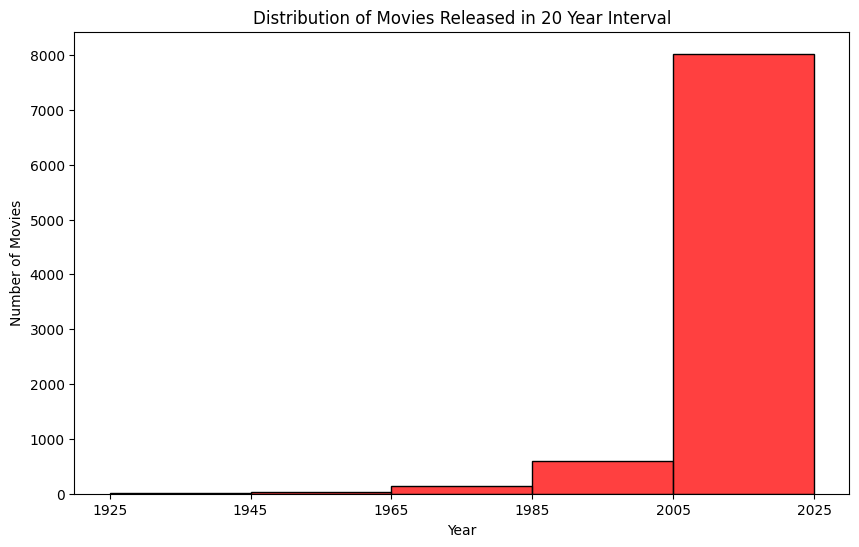

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=bins, kde=False, color='Red')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Released in 20 Year Interval')
plt.xticks(bins)
plt.show()

The data reveals a significant increase in the number of movies released on Netflix, particularly from 2005 to 2021. This period marks a substantial growth in the platform's movie catalog, reflecting Netflix's commitment to expanding its content offerings over the past two decades.


#### Comparison of TV Shows & Movies

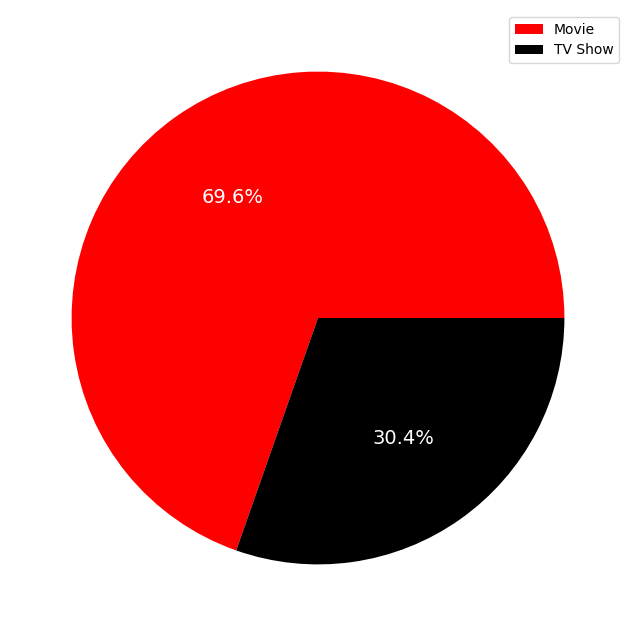

In [ ]:
# PLotting pie chart
plt.figure(figsize= (10,8))
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%.1f%%', textprops={'fontsize': 14, 'color': 'white'}, colors=['red', 'black'])
plt.legend()
plt.show()

In the provided visualization, it's evident that Netflix predominantly features more movies than TV shows. The chart clearly illustrates a higher count of movies compared to TV shows, showcasing the platform's emphasis on offering a diverse selection of films. This observation highlights Netflix's strategy of catering to a broad audience with an extensive movie library, contributing to its status as a leading streaming service in the industry.


#### Rating Comparison in Movies & TV Shows

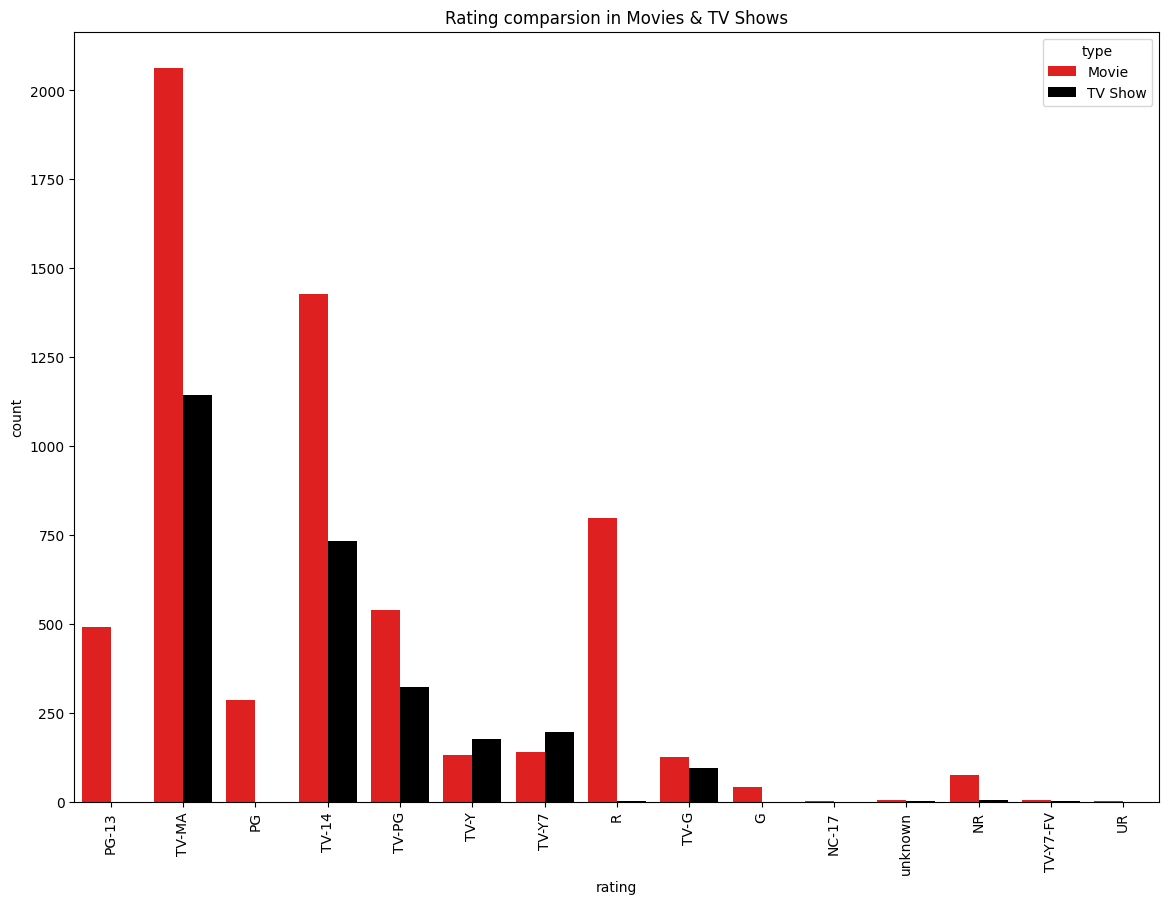

In [ ]:
# countplot
plt.figure(figsize= (14,10))
type_palette = {'Movie': 'red', 'TV Show': 'black'}
sns.countplot(x= 'rating', hue= 'type', data= data, palette=type_palette)
plt.title('Rating comparsion in Movies & TV Shows')
plt.xticks(rotation=90)
plt.show()

In the depicted data visualization, the distribution of movie ratings across different age categories is apparent. Notably, there is a higher concentration of movies rated for adults, followed by those rated for teenagers, and comparatively fewer for kids. This pattern suggests a content strategy that leans towards a mature audience, aligning with the diverse preferences of Netflix subscribers. The platform seems to prioritize adult-oriented content while still offering a varied selection for teens and kids.

### What is the best time to launch a TV show?


In [ ]:
netflix = data[['date_added']].dropna()

# Check for NaN values in 'date_added' before applying split
netflix['year'] = netflix['date_added'].apply(lambda x: x.split(', ')[-1] if not pd.isnull(x) else np.nan)
netflix['month'] = netflix['date_added'].apply(lambda x: x.lstrip().split(' ')[0] if not pd.isnull(x) else np.nan)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
best_time = netflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 6), dpi=2000)
plt.pcolor(best_time, cmap='Reds', edgecolor='white', linewidths=2)  # heatmap
plt.xticks(np.arange(0.5, len(best_time.columns), 1), best_time.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(best_time.index), 1), best_time.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

The visualization indicates that November 2019 and July 2019 stand out as the months with the highest content additions on Netflix. This insight suggests that these months might be strategically significant for uploading content to the platform, potentially aligning with Netflix's patterns of content expansion during these periods.So the best time to upload a content in Netflix is November & July.


### Analysis of actors/directors of different types of shows/movies.

#### Top 10 Directors


In [ ]:
directors = data[data['director'] != 'unknown']['director'].value_counts().head(10)
print(directors)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


Text(0.5, 1.0, 'Director Popularity')

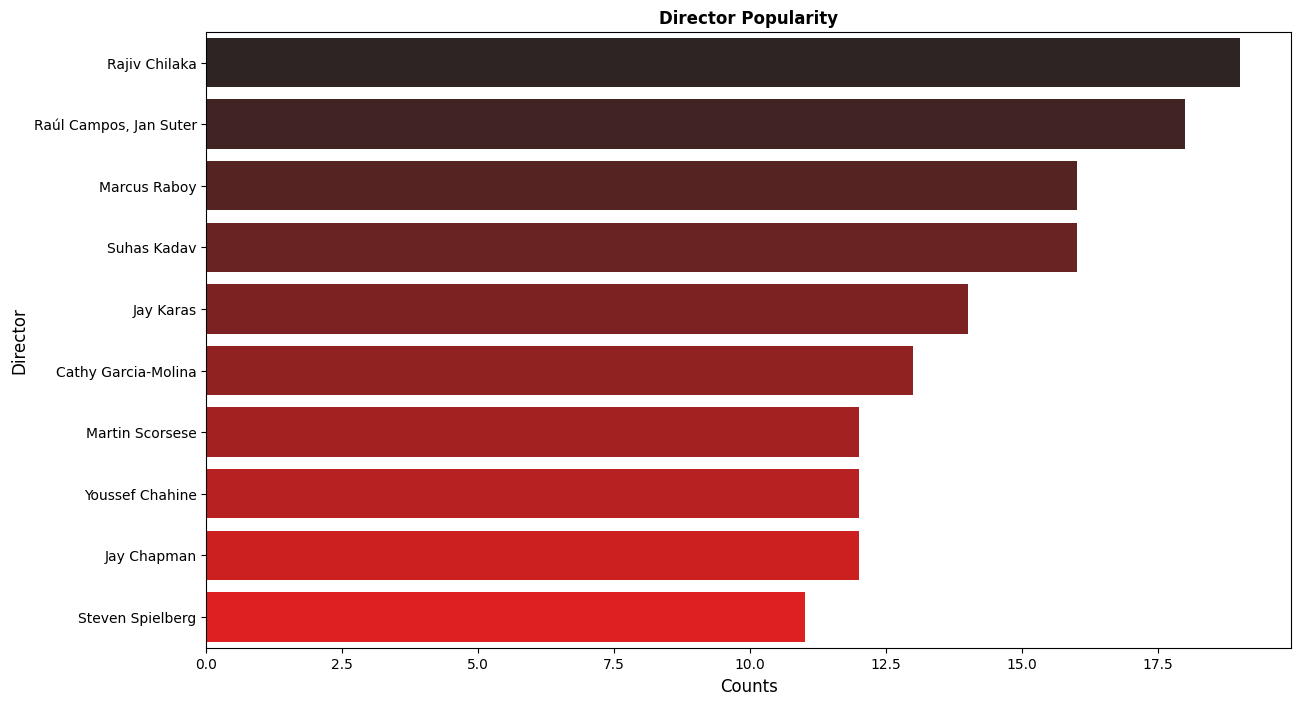

In [ ]:
plt.figure(figsize=(14,8))

colors = sns.color_palette("dark:red", n_colors=len(directors))

sns.barplot(x=directors.values, y=directors.index, palette=colors, hue=directors.index, dodge=False)

plt.xlabel('Counts', fontsize= 12)
plt.ylabel('Director', fontsize= 12)
plt.title('Director Popularity', fontweight='bold')

The visualization clearly illustrates that the majority of the most popular directors, as depicted by the data, hail from outside India. This observation underscores the global nature of popular content on the platform, showcasing Netflix's commitment to featuring diverse talents and catering to an international audience.

#### Top 10 Actors


In [ ]:
# Splitting the cast column and stacking it to create a new DataFrame
cast_data = data['cast'].str.split(',', expand=True).stack()
cast_data = cast_data.to_frame()
cast_data.columns = ['Actor']

# Grouping by actor
actors = cast_data.groupby(['Actor']).size().reset_index(name='Total Count')

# Excluding 'unknown' actors
actors = actors[actors.Actor != 'unknown']

# Sorting the actors DataFrame in descending order by Total Count
actors = actors.sort_values(by=['Total Count'], ascending=False)

# Selecting the top 10 actors
top10Actors = actors.head(10)

print(top10Actors.to_string(index=False))

            Actor  Total Count
      Anupam Kher           39
     Rupa Bhimani           31
 Takahiro Sakurai           30
    Julie Tejwani           28
          Om Puri           27
   Shah Rukh Khan           26
      Rajesh Kava           26
      Boman Irani           25
        Yuki Kaji           25
    Andrea Libman           25


Text(0.5, 1.0, 'Top 10 Actors Popularity')

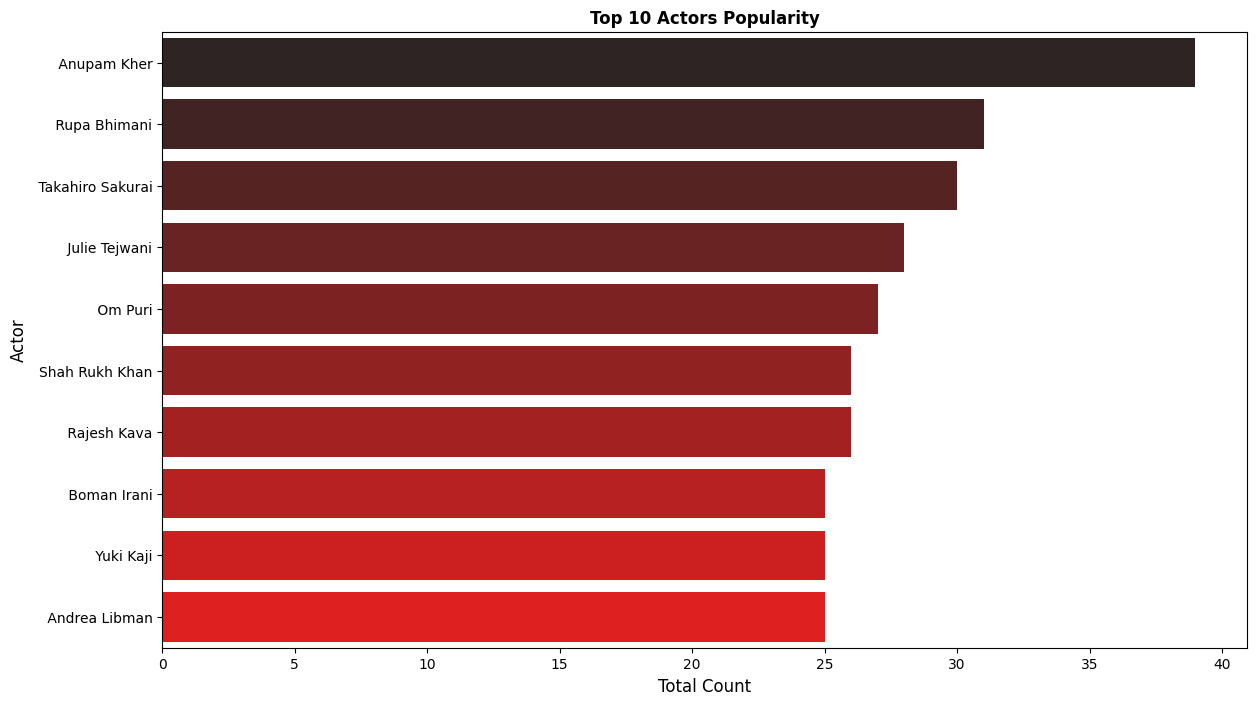

In [ ]:
plt.figure(figsize=(14, 8))

colors = sns.color_palette("dark:red", n_colors=len(top10Actors))

sns.barplot(x=top10Actors['Total Count'], y=top10Actors['Actor'],hue=top10Actors['Actor'], palette=colors)

plt.xlabel('Total Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('Top 10 Actors Popularity', fontweight='bold')

The visualization unmistakably reveals that the majority of the famous actors, as depicted in the data, are of Indian origin. This observation highlights the notable presence and influence of Indian actors on Netflix, reflecting both the platform's diverse content offerings and the popularity of Indian talent in the global entertainment landscape


### Does Netflix has more focus on TV Shows than movies in recent years.

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce') #converting to datetime

netflix = data[['date_added']].dropna() #dropping null values

netflix['year'] = netflix['date_added'].dt.year #extracting year
netflix['type'] = data['type']
data_recent_years = netflix[['year', 'type']]

recent_data = data_recent_years.groupby(['year', 'type']).size().reset_index(name='Total Count') #grouping
recent_data

,year,type,Total Count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


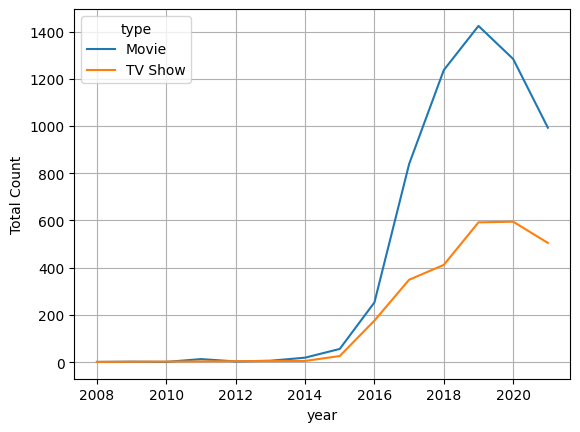

In [ ]:
sns.lineplot(data=recent_data, x='year', y='Total Count', hue='type')
plt.grid()

Looking at Netflix's recent content, it seems they are putting more attention on TV shows than movies. The chart shows that they are adding more TV shows compared to movies. This change might be because people enjoy binge-watching TV series, and Netflix is making more of them. It's interesting to see how Netflix is adapting its content to what viewers seem to like these days.


###  Understanding what content is available in different countries

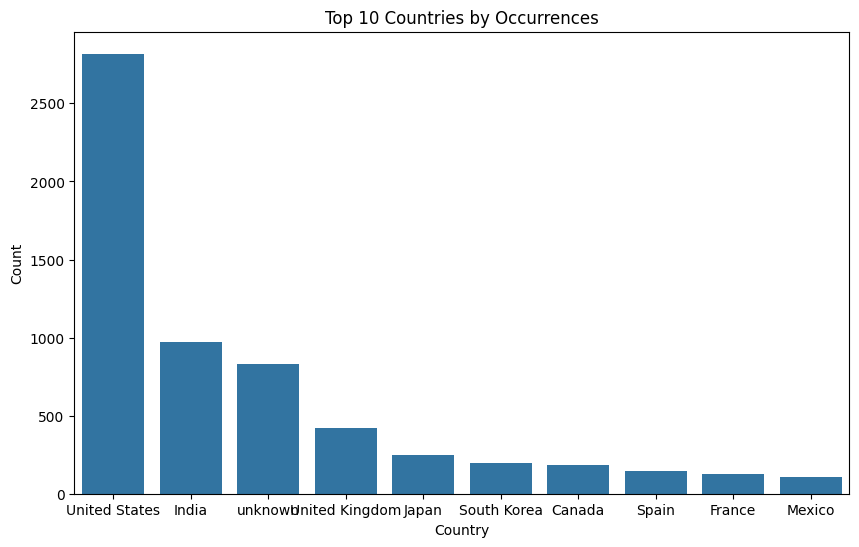

In [ ]:
values = data['country'].value_counts().reset_index()
values.columns = ['country', 'count']

top_10_values = values.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_10_values)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Occurrences')

plt.show()

"It's clear from the data that the United States has the most content available on streaming platforms, with a significant variety of movies and TV shows. Following is India, which also offers a diverse range of content. Other countries have comparatively less content on these platforms. This observation suggests that streaming services prioritize the U.S. market, potentially due to its large audience base and cultural influence. India, with its growing digital audience, is emerging as a key market for streaming platforms as well.

# Recommendations

- The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.
- Add TV Shows in July/August and Movies in last week of the year/first month of the next year.
- For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point, hence recommended.
- For UK audience, recommended length for movies is same as that of USA (80-120 mins)
- The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .
- Add movies for Indian Audience, it has been declining since 2018.
- Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.
- While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.